In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,preprocessing

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
breast_cancer.DESCR.split("\n")

['.. _breast_cancer_dataset:',
 '',
 'Breast cancer wisconsin (diagnostic) dataset',
 '--------------------------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 569',
 '',
 '    :Number of Attributes: 30 numeric, predictive attributes and the class',
 '',
 '    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry ',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        largest values) of these features were c

In [4]:
X = breast_cancer.data
Y = breast_cancer.target

In [5]:
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
from sklearn import model_selection

In [7]:
X_train,X_val,Y_train,Y_val = model_selection.train_test_split(X,Y)

In [8]:
scaler = preprocessing.StandardScaler()

In [9]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train_scaled = scaler.transform(X_train)

In [11]:
X_train_scaled.shape

(426, 30)

#### Inserting column of ones in dataset

In [12]:
X_train_scaled = np.append(X_train_scaled,np.ones(X_train_scaled.shape[0]).reshape(-1,1),axis=1)

In [13]:
X_train_scaled.shape,X_train_scaled[0].shape

((426, 31), (31,))

In [14]:
def sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

In [15]:
def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

In [16]:
def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

In [17]:
def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//100
    for i in range(epochs):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array

In [18]:
def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

In [19]:
def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [20]:
m,cost_array = fit(X_train_scaled,Y_train,5000,0.01)
print(m)

Epoch:0, Cost:287.0290218832631
Epoch:50, Cost:143.62481625529517
Epoch:100, Cost:110.43596891193037
Epoch:150, Cost:94.4234213428991
Epoch:200, Cost:84.61273121778811
Epoch:250, Cost:77.83535241300412
Epoch:300, Cost:72.8022235122822
Epoch:350, Cost:68.87899702729509
Epoch:400, Cost:65.71287356013663
Epoch:450, Cost:63.09009927281048
Epoch:500, Cost:60.872686184341504
Epoch:550, Cost:58.967086442403065
Epoch:600, Cost:57.30735638680932
Epoch:650, Cost:55.845505799465094
Epoch:700, Cost:54.54567081639308
Epoch:750, Cost:53.380441463561006
Epoch:800, Cost:52.32846221214753
Epoch:850, Cost:51.37281530577109
Epoch:900, Cost:50.49990213281007
Epoch:950, Cost:49.69865100411659
Epoch:1000, Cost:48.95994446843398
Epoch:1050, Cost:48.27619771261228
Epoch:1100, Cost:47.64104308478509
Epoch:1150, Cost:47.04909053874022
Epoch:1200, Cost:46.49574329938827
Epoch:1250, Cost:45.97705430069288
Epoch:1300, Cost:45.48961314248148
Epoch:1350, Cost:45.0304561786953
Epoch:1400, Cost:44.59699434028416
Epoch

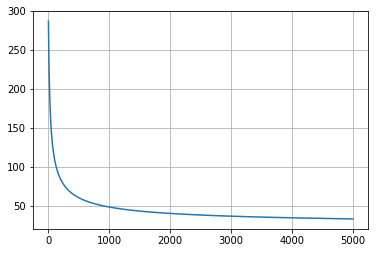

In [28]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [29]:
y_pred_train = predict(X_train_scaled,m)

In [30]:
accuracy(Y_train,y_pred_train)

98.12206572769952

In [31]:
X_val_scaled = scaler.transform(X_val)

In [32]:
X_val_scaled = np.append(X_val_scaled,np.ones(X_val_scaled.shape[0]).reshape(-1,1),axis=1)

In [33]:
y_pred_val = predict(X_val_scaled,m)

In [34]:
accuracy(Y_val,y_pred_val)

99.3006993006993